In [52]:
# Task 1.1

import numpy as np;
import matplotlib.pyplot as plt;
import zipfile;


# extract the images
f = zipfile.ZipFile("letters.zip",'r');
f.extractall('letters/');

images = [];

#travelsal all the images from folder then flatten it
for file in f.namelist():
    path = 'letters/'+file;
    image = plt.imread(path);
    image = image[:,:,0];
    image = image.flatten();
    images.append(image);
f.close();

images = np.array(images);
print("the shape of images:",images.shape);

# making random image data arrangement
np.random.seed(2019);
np.random.shuffle(images);



the shape of images: (1800, 16384)


(360, 9)
iteration:  1  the within-cluster square error is:  159314.73200571944
(360, 9)
iteration:  2  the within-cluster square error is:  153410.27484826883
(360, 9)
iteration:  3  the within-cluster square error is:  150718.82499153994
(360, 9)
iteration:  4  the within-cluster square error is:  149624.69117320015
(360, 9)
iteration:  5  the within-cluster square error is:  149366.63637349682
(360, 9)
iteration:  6  the within-cluster square error is:  149186.16402153182
(360, 9)
iteration:  7  the within-cluster square error is:  149091.44315771418
(360, 9)
iteration:  8  the within-cluster square error is:  149021.59321831437
(360, 9)
iteration:  9  the within-cluster square error is:  148806.30683696104
(360, 9)
iteration:  10  the within-cluster square error is:  148528.95552674457
(360, 9)
iteration:  11  the within-cluster square error is:  148251.62327633542
(360, 9)
iteration:  12  the within-cluster square error is:  147953.03255233602
(360, 9)
iteration:  13  the within-c

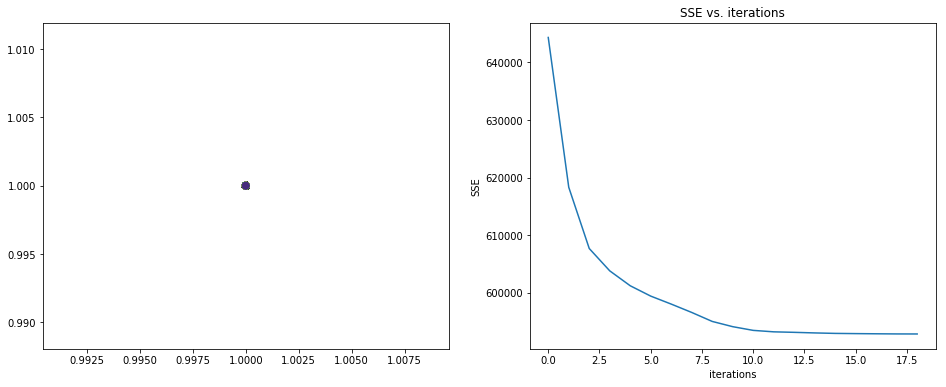

In [53]:
### Task 1.2  1)  2)

# Euclidean Distance Caculator
# Compute the distance from all X to all centroids
# the return distance are in size of (n_data,n_centroids)
def Euclidean_Distance(X_data, centroids):
        
    n_centres = centroids.shape[0]
    distances = []
    for c in range(n_centres):        
        distance_to_c = np.linalg.norm(X_data - centroids[c], axis=1)
        distances.append(distance_to_c)
    return np.array(distances).T


# computing the error function for clustering
def computing_SSE(X,assignments,centroids):
    
    # initialize the within-cluster sum of square errors (SSE)
    SSE = 0
    n_centres = centroids.shape[0]
    
    for c in range(n_centres):  
        # extract only data points belong to centroid c
        X_c = X[assignments == c]   
        distance_to_c = np.linalg.norm(X_c - centroids[c], axis=1)
        distance_to_c = distance_to_c * distance_to_c
        SSE = SSE + np.sum(distance_to_c)
        #print(SSE)
        
    return SSE

# the function for computing the MSE error 
def MSE_computing(PHI,beta_,ground_truth):
    y_predicted = dot(PHI,beta_);
    err =  np.linalg.norm(y_predicted - ground_truth)/len(ground_truth);
    return err**2;



# K-means clustering algorithm
# given input data, and the number of cluster to be discovered
# rseed is a random seed number
def find_clusters(X, n_clusters, rseed=2019):
    # 1. Randomly choose clusters: pick a random data point to set as a centroid (try to pick n_clusters centroids)
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    # each centroid is put in one row of centroids
    centroids = X[i]

    iterations = 0    
    errors=[]
    
    while True:        
        # computing the distance from all data points to all centroids
        distances = Euclidean_Distance(X, centroids)
        print(distances.shape)
        # 1. Assign labels based on closest centroid. 
        assignments_index = np.argmin(distances,axis=1)       
        
        
        # 2. Find/update new centroids from means of points
        
        new_centroids = np.zeros(centroids.shape)        
        for i in range(n_clusters):
            # pick only rows that has assignment to class i
            new_centroids[i] = X[assignments_index == i].mean(0)        
        
        # 3. Check for convergence (if the centroid does not move)
        # we can also check the SSE (error)
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
        
        iterations = iterations + 1
        # computing the SSE
        SSE = computing_SSE(X, assignments_index, centroids)
        print("iteration: ",iterations," the within-cluster square error is: ",SSE)
        errors.append(SSE)     
        
    
    return  centroids, assignments_index, errors


# split image data to training data and testing data
size = images.shape[0];

data_training = images[:int(size*0.8),:];
data_test = images[int(size*0.8):,:];

X = data_test;

centroids, assignments, errors = find_clusters(X, 9);
print("SSE error for the testing data is: ",errors);

X = data_training;

centroids, assignments, errors = find_clusters(X, 9);
print("SSE error for the training data is: ",errors);

    
# Visulization the found clusters and error plotting.
fig = plt.figure(figsize=(16, 6))
ax = fig.add_subplot(121)                                                

plt.scatter(X[:, 0], X[:, 1], c=assignments, s=50, cmap='viridis');


ax = fig.add_subplot(122)
ax.set_title("SSE vs. iterations")
ax.set_xlabel('iterations')
ax.set_ylabel('SSE')
plt.plot(errors)


    

drawing the 9 image centroids and it's most closest image:
centroid  1  :


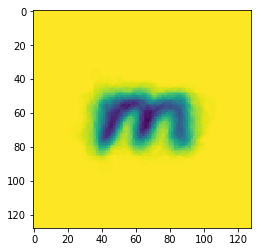

the most closest image to the centroid  1  :


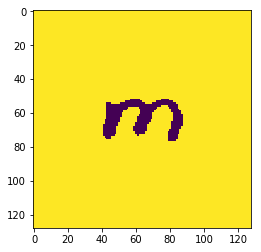

centroid  2  :


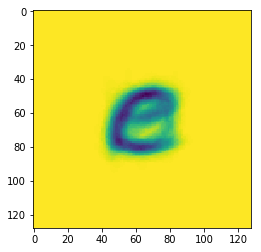

the most closest image to the centroid  2  :


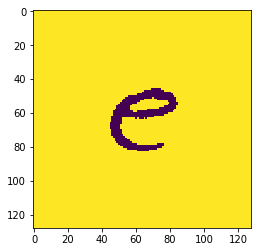

centroid  3  :


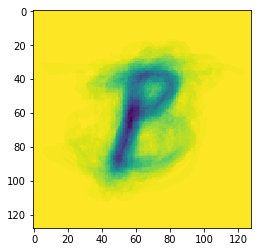

the most closest image to the centroid  3  :


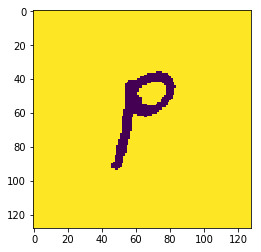

centroid  4  :


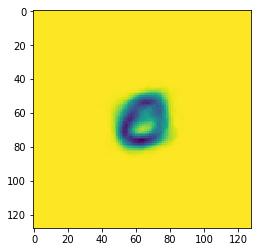

the most closest image to the centroid  4  :


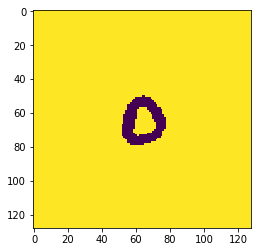

centroid  5  :


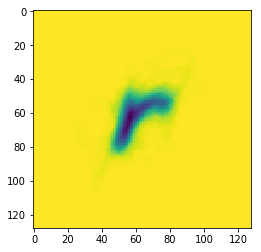

the most closest image to the centroid  5  :


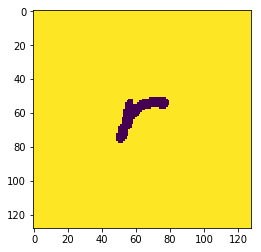

centroid  6  :


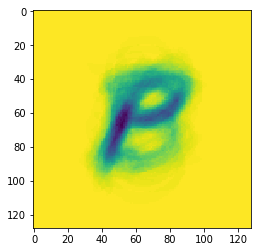

the most closest image to the centroid  6  :


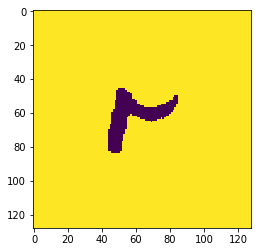

centroid  7  :


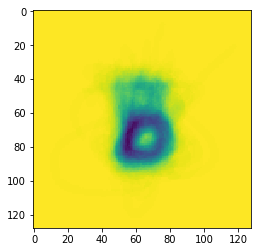

the most closest image to the centroid  7  :


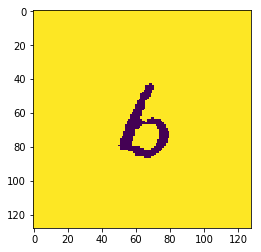

centroid  8  :


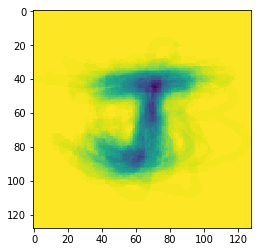

the most closest image to the centroid  8  :


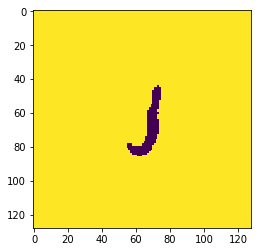

centroid  9  :


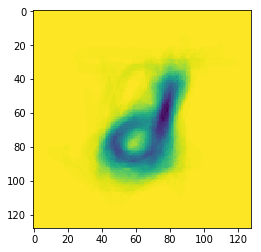

the most closest image to the centroid  9  :


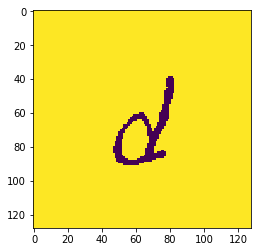

In [54]:
#tesk 1.2  3) 4)

print("drawing the 9 image centroids and it's most closest image:");


for i in range(centroids.shape[0]):
    print("centroid ",i+1," :");
    img=centroids[i].reshape([128,128]);
    plt.imshow(img);
    plt.show();
    
    minDistance = 9999999;
    closestIndex = 0;
    for j in range (assignments.shape[0]):
        if assignments[j] == i :
            distance = np.linalg.norm(X[j] - centroids[i]);
            if distance < minDistance :
                minDistance = distance;
                closestIndex = j;
    print("the most closest image to the centroid ",i+1," :");
    img=X[closestIndex].reshape([128,128]);
    plt.imshow(img);
    plt.show();
            

for the number of centroid is : 6
(960, 6)
iteration:  1  the within-cluster square error is:  444863.9802078164
(960, 6)
iteration:  2  the within-cluster square error is:  431130.3191672344
(960, 6)
iteration:  3  the within-cluster square error is:  424854.7424776545
(960, 6)
iteration:  4  the within-cluster square error is:  421479.9167060234
(960, 6)
iteration:  5  the within-cluster square error is:  419066.8777558522
(960, 6)
iteration:  6  the within-cluster square error is:  415887.7548844211
(960, 6)
iteration:  7  the within-cluster square error is:  413916.91588468774
(960, 6)
iteration:  8  the within-cluster square error is:  412952.091428078
(960, 6)
iteration:  9  the within-cluster square error is:  412532.40857505973
(960, 6)
iteration:  10  the within-cluster square error is:  412260.7906524007
(960, 6)
iteration:  11  the within-cluster square error is:  412079.04242368706
(960, 6)
iteration:  12  the within-cluster square error is:  412003.81574942404
(960, 6)
ite

(960, 9)
iteration:  19  the within-cluster square error is:  391534.6763601962
(960, 9)
iteration:  20  the within-cluster square error is:  391472.09632981
(960, 9)
iteration:  21  the within-cluster square error is:  391411.58059141075
(960, 9)
iteration:  22  the within-cluster square error is:  391359.7700732184
(960, 9)
iteration:  23  the within-cluster square error is:  391334.35074017267
(960, 9)
iteration:  24  the within-cluster square error is:  391325.7215913265
(960, 9)
(960, 9)
iteration:  1  the within-cluster square error is:  438702.9236574777
(960, 9)
iteration:  2  the within-cluster square error is:  423304.0703317984
(960, 9)
iteration:  3  the within-cluster square error is:  418714.7217696789
(960, 9)
iteration:  4  the within-cluster square error is:  415804.37015440135
(960, 9)
iteration:  5  the within-cluster square error is:  413587.68308855034
(960, 9)
iteration:  6  the within-cluster square error is:  411441.0752894079
(960, 9)
iteration:  7  the within-

(960, 12)
iteration:  5  the within-cluster square error is:  401667.4532040707
(960, 12)
iteration:  6  the within-cluster square error is:  400155.7169199152
(960, 12)
iteration:  7  the within-cluster square error is:  398396.8931562985
(960, 12)
iteration:  8  the within-cluster square error is:  397030.8188229977
(960, 12)
iteration:  9  the within-cluster square error is:  396083.9738540382
(960, 12)
iteration:  10  the within-cluster square error is:  395490.55262473086
(960, 12)
iteration:  11  the within-cluster square error is:  395083.91415503295
(960, 12)
iteration:  12  the within-cluster square error is:  394884.2515344705
(960, 12)
iteration:  13  the within-cluster square error is:  394795.7635115037
(960, 12)
iteration:  14  the within-cluster square error is:  394685.35502889473
(960, 12)
iteration:  15  the within-cluster square error is:  394651.2040645208
(960, 12)
iteration:  16  the within-cluster square error is:  394629.15476985776
(960, 12)
iteration:  17  the

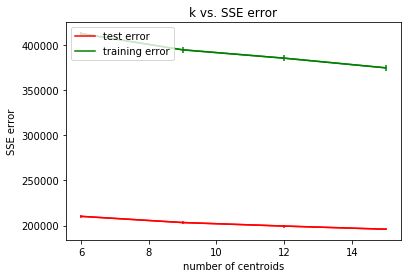

In [55]:
# Task 1.3


def K_fold_cross_validation(data, K_folds, k):
    n_data = data.shape[0]
    
    # validation data's size
    test_size = int(n_data/K_folds)   
    
    #loop over k fold (each time leave one out to make a test set)  
    
    all_errors_test  = []
    all_errors_train = []
    for i in range(K_folds):
        X_test = data[test_size*i:test_size*(i+1),:]
        training_data  = data[0:test_size*i,:]
        X_training  = np.vstack((training_data,data[test_size*(i+1):,:]))
      
        
        #1. Clustering on training
        centroids, assignments, errors = find_clusters(X_training, k)        
        
       
        #################  ERROR COMPUTING  ############################
        #2. Computing error on the training dataset
        err_train = computing_SSE(X_training, assignments, centroids)
        
        #3. Computing error on the testing dataset
        ## 3.1 first compute the distance from test points to centroids
        distances = Euclidean_Distance(X_test, centroids)
        ## 3.2 assign test point to its closest centroid       
        assignments_test_data = np.argmin(distances,axis=1)  
        ## 3.3 compute the SSE for test points
        err_test = computing_SSE(X_test, assignments_test_data, centroids)
    
       
        
        # add this test/training error for computing statistics
        all_errors_test.append(err_test)
        all_errors_train.append(err_train)
        
        
    # returning the mean and standard deviation of the cross-validated errors
    return np.mean(all_errors_test), np.std(all_errors_test),np.mean(all_errors_train), np.std(all_errors_train)




K_folds = 3

candidates = [6,9,12,15];
num_candidates = 4
regular = np.zeros([num_candidates,5])

best_number_centroids = 0;
best_SSE = 1000000;

# loop over num_candidates 
for k in range(0,num_candidates): 
    number_centroids = candidates[k];
    print("for the number of centroid is :",number_centroids);
    mean_test, std_test, mean_train, mean_std = K_fold_cross_validation(X,K_folds,number_centroids)
    
    regular[k,0] = number_centroids;
    regular[k,1:] = mean_test, std_test, mean_train, mean_std
    
    if best_SSE > mean_test:
        best_SSE = mean_test
        best_number_centroids = number_centroids;
        
        
fig = plt.figure()
fig = fig.add_subplot(1, 1, 1) 
plt.plot(candidates,regular[:,1],'red',label="test error")
plt.plot(candidates,regular[:,3],'green',label="training error")

# plotting the error bars (with standard deviations)
plt.errorbar(candidates,regular[:,1], yerr=regular[:,2], color='red')
plt.errorbar(candidates,regular[:,3], yerr=regular[:,4], color='green')

plt.title("k vs. SSE error")
plt.legend(loc='upper left')
plt.xlabel('number of centroids')
plt.ylabel('SSE error')
plt.draw()

print('best number of centroids = ',best_number_centroids)
print('best best_SSE = ',best_SSE)

In [56]:
#Task 2.1

from numpy import dot;
from numpy.linalg import inv;

data = np.loadtxt("regression.data");
dataShape = data.shape;
print ("data.shape:", dataShape);

# split image data to training data and testing data
dataRow = dataShape[0];
trainDataRow = int(dataRow*0.8);

trainingSet = data[:trainDataRow,:];
testSet = data[trainDataRow:,:];
trainDataShape = trainingSet.shape;
testDataShape = testSet.shape;
print("trainingSet.shape:",trainDataShape);
print("testSet.shape:",testDataShape);


X, y = trainingSet[:, :2], trainingSet[:, 2];
print ("X.shape:", X.shape);
print ("y.shape:", y.shape);
X_test, y_test = testSet[:, :2], testSet[:, 2];
print ("X_test:", X_test.shape);
print ("y_test:", y_test.shape);



# do the k-means cluster to get the centroid
centroids, assignments, errors = find_clusters(X, 3);
 
print(centroids.shape);    
print(centroids);


# fit RBF model
def RBF_Features(X,C,bandwith):
    PHI = np.ones(X.shape[0]); # prepend ones
    for i in range(C.shape[0]): # loop over each center c_i
        distance = X - C[i,:]; # (difference from all x to center c_i)
        # square the difference, and use sum to compute the magnitude /llength of this difference vector
        distance_2 = np.sum(np.multiply(distance,distance),axis=1); 
        PHI_i = np.exp(-distance_2/(2*bandwith)) # feature i correspond to center c_i
        PHI = np.column_stack([PHI, PHI_i]) # stack all feature phi_i
    return PHI;




bandwith = 2.0;

PHI_X_RBF = RBF_Features(X,centroids,bandwith);


# β= (XT*X+λI)^−1 *XT *Y

theta = 0.1;

Identity = np.identity(PHI_X_RBF.shape[1]);
XXT_inv = inv(np.add(dot(PHI_X_RBF.T, PHI_X_RBF),theta*Identity));
betaRBF_ = dot(dot(XXT_inv, PHI_X_RBF.T),y);
print(np.shape(betaRBF_));


#Training error of RBF feature
err_training = MSE_computing(PHI_X_RBF,betaRBF_,y);
print("Training MSE of RBF feature is",err_training);

#computing The feature matrix for X_test
PHI_X_test = RBF_Features(X_test,centroids,bandwith);

#Testing error of RBF feature
err_test = MSE_computing(PHI_X_test,betaRBF_,y_test);
print("Testing MSE of RBF feature is",err_test);




data.shape: (600, 3)
trainingSet.shape: (480, 3)
testSet.shape: (120, 3)
X.shape: (480, 2)
y.shape: (480,)
X_test: (120, 2)
y_test: (120,)
(480, 3)
iteration:  1  the within-cluster square error is:  4872.364293925546
(480, 3)
iteration:  2  the within-cluster square error is:  4476.010449235328
(480, 3)
iteration:  3  the within-cluster square error is:  4232.093760678382
(480, 3)
iteration:  4  the within-cluster square error is:  3946.752196289464
(480, 3)
iteration:  5  the within-cluster square error is:  3764.534692612726
(480, 3)
iteration:  6  the within-cluster square error is:  3577.583970758438
(480, 3)
iteration:  7  the within-cluster square error is:  3458.4468377104586
(480, 3)
iteration:  8  the within-cluster square error is:  3416.5183990028745
(480, 3)
iteration:  9  the within-cluster square error is:  3412.2067766047558
(480, 3)
iteration:  10  the within-cluster square error is:  3410.3493582134306
(480, 3)
iteration:  11  the within-cluster square error is:  3409

for the number of centroid is : 10
(480, 10)
iteration:  1  the within-cluster square error is:  1718.7765359248617
(480, 10)
iteration:  2  the within-cluster square error is:  1385.9136377478824
(480, 10)
iteration:  3  the within-cluster square error is:  1331.757415198239
(480, 10)
iteration:  4  the within-cluster square error is:  1315.3785353325186
(480, 10)
iteration:  5  the within-cluster square error is:  1311.8632340616841
(480, 10)
iteration:  6  the within-cluster square error is:  1308.1808359787174
(480, 10)
iteration:  7  the within-cluster square error is:  1306.6731777637885
(480, 10)
iteration:  8  the within-cluster square error is:  1303.7739608849308
(480, 10)
iteration:  9  the within-cluster square error is:  1300.1298227112247
(480, 10)
iteration:  10  the within-cluster square error is:  1297.9590976713287
(480, 10)
iteration:  11  the within-cluster square error is:  1297.2187993749922
(480, 10)
iteration:  12  the within-cluster square error is:  1296.08603

iteration:  2  the within-cluster square error is:  750.4287805413446
(480, 20)
iteration:  3  the within-cluster square error is:  713.9561497204306
(480, 20)
iteration:  4  the within-cluster square error is:  674.535561730939
(480, 20)
iteration:  5  the within-cluster square error is:  646.0551914506833
(480, 20)
iteration:  6  the within-cluster square error is:  627.5152829942663
(480, 20)
iteration:  7  the within-cluster square error is:  624.3240348586363
(480, 20)
iteration:  8  the within-cluster square error is:  619.8201632155069
(480, 20)
iteration:  9  the within-cluster square error is:  616.7622858851907
(480, 20)
iteration:  10  the within-cluster square error is:  614.3093899695006
(480, 20)
iteration:  11  the within-cluster square error is:  612.2375687123414
(480, 20)
iteration:  12  the within-cluster square error is:  605.9010145314024
(480, 20)
iteration:  13  the within-cluster square error is:  597.849817516384
(480, 20)
iteration:  14  the within-cluster squ

(480, 40)
iteration:  11  the within-cluster square error is:  289.3275618113253
(480, 40)
iteration:  12  the within-cluster square error is:  289.2275489251111
(480, 40)
(480, 40)
iteration:  1  the within-cluster square error is:  434.53680845216513
(480, 40)
iteration:  2  the within-cluster square error is:  359.44045077645086
(480, 40)
iteration:  3  the within-cluster square error is:  324.1913544852208
(480, 40)
iteration:  4  the within-cluster square error is:  314.9023953855681
(480, 40)
iteration:  5  the within-cluster square error is:  308.7701842295814
(480, 40)
iteration:  6  the within-cluster square error is:  302.38388542696595
(480, 40)
iteration:  7  the within-cluster square error is:  298.43710252029206
(480, 40)
iteration:  8  the within-cluster square error is:  295.67298732308143
(480, 40)
iteration:  9  the within-cluster square error is:  294.90034452119556
(480, 40)
iteration:  10  the within-cluster square error is:  293.9787256160484
(480, 40)
iteration: 

(480, 60)
iteration:  6  the within-cluster square error is:  208.44177584799058
(480, 60)
iteration:  7  the within-cluster square error is:  207.95191909615852
(480, 60)
iteration:  8  the within-cluster square error is:  207.459667108539
(480, 60)
(480, 60)
iteration:  1  the within-cluster square error is:  279.88794918850505
(480, 60)
iteration:  2  the within-cluster square error is:  230.38827086100093
(480, 60)
iteration:  3  the within-cluster square error is:  218.1570249170654
(480, 60)
iteration:  4  the within-cluster square error is:  208.31465201198358
(480, 60)
iteration:  5  the within-cluster square error is:  206.00039719442725
(480, 60)
iteration:  6  the within-cluster square error is:  205.12632638295946
(480, 60)
iteration:  7  the within-cluster square error is:  202.96923590637664
(480, 60)
iteration:  8  the within-cluster square error is:  202.49403199717062
(480, 60)
(480, 60)
iteration:  1  the within-cluster square error is:  290.4233467097734
(480, 60)
it

iteration:  9  the within-cluster square error is:  143.61550727244014
(480, 80)
iteration:  10  the within-cluster square error is:  143.5325091103914
(480, 80)
(480, 80)
iteration:  1  the within-cluster square error is:  220.395482265533
(480, 80)
iteration:  2  the within-cluster square error is:  173.60235831398407
(480, 80)
iteration:  3  the within-cluster square error is:  149.78386710819206
(480, 80)
iteration:  4  the within-cluster square error is:  135.64035952264945
(480, 80)
iteration:  5  the within-cluster square error is:  126.97104796717744
(480, 80)
iteration:  6  the within-cluster square error is:  126.49645940743007
(480, 80)
iteration:  7  the within-cluster square error is:  126.2893960300097
(480, 80)
iteration:  8  the within-cluster square error is:  126.20207090932232
(480, 80)
(480, 80)
iteration:  1  the within-cluster square error is:  227.4672826648387
(480, 80)
iteration:  2  the within-cluster square error is:  173.72694033922556
(480, 80)
iteration:  

iteration:  5  the within-cluster square error is:  93.91014795171537
(480, 100)
iteration:  6  the within-cluster square error is:  91.94688656214619
(480, 100)
iteration:  7  the within-cluster square error is:  91.87199430341207
(480, 100)
best number of centroids =  100
best best_SSE =  73.73524175358287


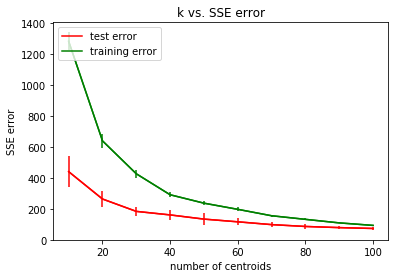

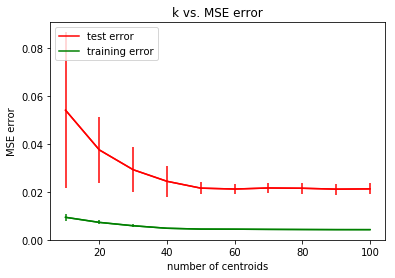

In [27]:
#Task 2.2


def k_fold_cross_validation_RBF(data, k,number_centroids):
    n_data = data.shape[0];
    test_size = int(n_data/k);   
    
    bandwidth = 2.0;
    lamda = 0.1;
    
      
    # lists to contain SSE and MSE error
    all_SSE_errors_test  = [];
    all_SSE_errors_train = [];
    all_MSE_errors_test  = [];
    all_MSE_errors_train = [];  
    
    #loop over k fold (each time leave one out to make a test set)
    for i in range(k):
        leave_out_data = data[test_size*i:test_size*(i+1),:]
        training_data  = data[0:test_size*i,:]
        training_data  = np.vstack((training_data,data[test_size*(i+1):,:]))
        
        # computing feature matrix
        X_training, y_training = training_data[:,:-1],training_data[:,-1];
        
        centroids, assignments, errors = find_clusters(X_training, number_centroids);
        
        
        PHI_training_data = RBF_Features(X_training,centroids,bandwidth);    
        
        Identity = np.identity(PHI_training_data.shape[1]) # identity matrix

        beta__ = dot(dot(inv(np.add(dot(PHI_training_data.T, PHI_training_data),lamda*Identity)), 
                         PHI_training_data.T), y_training);
        
        
        X_test, y_test = leave_out_data[:,:-1],leave_out_data[:,-1];
        
        # calculate SSE
        SSE_err_train = computing_SSE(X_training, assignments, centroids);       
        distances = Euclidean_Distance(X_test, centroids);
        assignments_test_data = np.argmin(distances,axis=1);
        SSE_err_test = computing_SSE(X_test, assignments_test_data, centroids);
        
        all_SSE_errors_test.append(SSE_err_test);
        all_SSE_errors_train.append(SSE_err_train);
        
        
        # calculare MSE
        #computing error on the training dataset
        err_train =  MSE_computing(PHI_training_data,beta__,y_training)           
        #computing error on the leave_out dataset
        PHI_leave_out_data = RBF_Features(X_test,centroids,bandwidth);
        err_test =  MSE_computing(PHI_leave_out_data,beta__,y_test)
        
        # add this test/training error for computing statistics
        all_MSE_errors_test.append(err_test)
        all_MSE_errors_train.append(err_train)
        
        
    # returning the mean and standard deviation of the cross-validated errors
    return np.mean(all_SSE_errors_test), np.std(all_SSE_errors_test),np.mean(all_SSE_errors_train), np.std(all_SSE_errors_train),np.mean(all_MSE_errors_test), np.std(all_MSE_errors_test),np.mean(all_MSE_errors_train), np.std(all_MSE_errors_train);




K_folds = 5;

num_candidates = 10;
regular = np.zeros([num_candidates,9]);

best_number_centroids = 0;
best_SSE = 10000.;


# loop over num_candidates possible candidates of lambda
for k in range(0,10): 
    number_centroids = (k+1)*10;
    print("for the number of centroid is :",number_centroids);
    sse_mean_test, sse_std_test, sse_mean_train, sse_mean_std,mse_mean_test, mse_std_test, mse_mean_train, mse_mean_std = k_fold_cross_validation_RBF(data,K_folds,number_centroids);
    
    regular[k,0] = number_centroids;
    regular[k,1:] = sse_mean_test, sse_std_test, sse_mean_train, sse_mean_std,mse_mean_test, mse_std_test, mse_mean_train, mse_mean_std;
    
    if best_SSE > sse_mean_test:
        best_SSE = sse_mean_test;
        best_number_centroids = number_centroids;
        
        
fig = plt.figure()
fig = fig.add_subplot(1, 1, 1) 
plt.plot(np.arange(10,101,10),regular[:,1],'red',label="test error")
plt.plot(np.arange(10,101,10),regular[:,3],'green',label="training error")

# plotting the error bars (with standard deviations)
plt.errorbar(np.arange(10,101,10),regular[:,1], yerr=regular[:,2], color='red')
plt.errorbar(np.arange(10,101,10),regular[:,3], yerr=regular[:,4], color='green')

plt.title("k vs. SSE error")
plt.legend(loc='upper left')
plt.xlabel('number of centroids')
plt.ylabel('SSE error')
plt.draw()

print('best number of centroids = ',best_number_centroids)
print('best best_SSE = ',best_SSE)


fig = plt.figure()
fig = fig.add_subplot(1, 1, 1) 
plt.plot(np.arange(10,101,10),regular[:,5],'red',label="test error")
plt.plot(np.arange(10,101,10),regular[:,7],'green',label="training error")

# plotting the error bars (with standard deviations)
plt.errorbar(np.arange(10,101,10),regular[:,5], yerr=regular[:,6], color='red')
plt.errorbar(np.arange(10,101,10),regular[:,7], yerr=regular[:,8], color='green')

plt.title("k vs. MSE error")
plt.legend(loc='upper left')
plt.xlabel('number of centroids')
plt.ylabel('MSE error')
plt.draw()





RBF feature with five_fold_cross_validation:
(480, 100)
iteration:  1  the within-cluster square error is:  146.4003413449461
(480, 100)
iteration:  2  the within-cluster square error is:  121.30184770370391
(480, 100)
iteration:  3  the within-cluster square error is:  110.09572229348768
(480, 100)
iteration:  4  the within-cluster square error is:  102.61662496705681
(480, 100)
iteration:  5  the within-cluster square error is:  98.20857264669235
(480, 100)
iteration:  6  the within-cluster square error is:  97.25017840349167
(480, 100)
iteration:  7  the within-cluster square error is:  96.77988924701133
(480, 100)
iteration:  8  the within-cluster square error is:  95.24855623605855
(480, 100)
iteration:  9  the within-cluster square error is:  93.47956151094644
(480, 100)
iteration:  10  the within-cluster square error is:  93.17607820868423
(480, 100)
(480, 100)
iteration:  1  the within-cluster square error is:  149.87709949405658
(480, 100)
iteration:  2  the within-cluster squ

(480, 100)
(480, 100)
iteration:  1  the within-cluster square error is:  140.32713543927727
(480, 100)
iteration:  2  the within-cluster square error is:  118.95884835992094
(480, 100)
iteration:  3  the within-cluster square error is:  106.07051142846177
(480, 100)
iteration:  4  the within-cluster square error is:  102.88834094324169
(480, 100)
iteration:  5  the within-cluster square error is:  97.20085846364664
(480, 100)
iteration:  6  the within-cluster square error is:  96.84475506683283
(480, 100)
iteration:  7  the within-cluster square error is:  96.55436220345217
(480, 100)
iteration:  8  the within-cluster square error is:  95.0230291924994
(480, 100)
iteration:  9  the within-cluster square error is:  93.25403446738727
(480, 100)
iteration:  10  the within-cluster square error is:  92.95055116512506
(480, 100)
(480, 100)
iteration:  1  the within-cluster square error is:  154.96472889004548
(480, 100)
iteration:  2  the within-cluster square error is:  126.01719570326246


iteration:  3  the within-cluster square error is:  109.79583406666475
(480, 100)
iteration:  4  the within-cluster square error is:  99.09545845135278
(480, 100)
iteration:  5  the within-cluster square error is:  93.91014795171537
(480, 100)
iteration:  6  the within-cluster square error is:  91.94688656214619
(480, 100)
iteration:  7  the within-cluster square error is:  91.87199430341207
(480, 100)
(480, 100)
iteration:  1  the within-cluster square error is:  146.4003413449461
(480, 100)
iteration:  2  the within-cluster square error is:  121.30184770370391
(480, 100)
iteration:  3  the within-cluster square error is:  110.09572229348768
(480, 100)
iteration:  4  the within-cluster square error is:  102.61662496705681
(480, 100)
iteration:  5  the within-cluster square error is:  98.20857264669235
(480, 100)
iteration:  6  the within-cluster square error is:  97.25017840349167
(480, 100)
iteration:  7  the within-cluster square error is:  96.77988924701133
(480, 100)
iteration:  8

iteration:  1  the within-cluster square error is:  149.87709949405658
(480, 100)
iteration:  2  the within-cluster square error is:  128.35351950156848
(480, 100)
iteration:  3  the within-cluster square error is:  113.83264237111905
(480, 100)
iteration:  4  the within-cluster square error is:  105.34594009790895
(480, 100)
iteration:  5  the within-cluster square error is:  102.82319413627525
(480, 100)
iteration:  6  the within-cluster square error is:  101.88340800293815
(480, 100)
iteration:  7  the within-cluster square error is:  101.22764184998208
(480, 100)
iteration:  8  the within-cluster square error is:  99.60871195573932
(480, 100)
iteration:  9  the within-cluster square error is:  97.67560940256176
(480, 100)
iteration:  10  the within-cluster square error is:  97.20306893425315
(480, 100)
(480, 100)
iteration:  1  the within-cluster square error is:  140.32713543927727
(480, 100)
iteration:  2  the within-cluster square error is:  118.95884835992094
(480, 100)
iterati

iteration:  1  the within-cluster square error is:  154.96472889004548
(480, 100)
iteration:  2  the within-cluster square error is:  126.01719570326246
(480, 100)
iteration:  3  the within-cluster square error is:  109.4515127494827
(480, 100)
iteration:  4  the within-cluster square error is:  98.02189672045381
(480, 100)
iteration:  5  the within-cluster square error is:  93.57598484530746
(480, 100)
iteration:  6  the within-cluster square error is:  93.04606738234254
(480, 100)
iteration:  7  the within-cluster square error is:  92.66575476328752
(480, 100)
(480, 100)
iteration:  1  the within-cluster square error is:  174.5168082915814
(480, 100)
iteration:  2  the within-cluster square error is:  131.15373465687077
(480, 100)
iteration:  3  the within-cluster square error is:  109.79583406666475
(480, 100)
iteration:  4  the within-cluster square error is:  99.09545845135278
(480, 100)
iteration:  5  the within-cluster square error is:  93.91014795171537
(480, 100)
iteration:  6

iteration:  5  the within-cluster square error is:  98.20857264669235
(480, 100)
iteration:  6  the within-cluster square error is:  97.25017840349167
(480, 100)
iteration:  7  the within-cluster square error is:  96.77988924701133
(480, 100)
iteration:  8  the within-cluster square error is:  95.24855623605855
(480, 100)
iteration:  9  the within-cluster square error is:  93.47956151094644
(480, 100)
iteration:  10  the within-cluster square error is:  93.17607820868423
(480, 100)
(480, 100)
iteration:  1  the within-cluster square error is:  149.87709949405658
(480, 100)
iteration:  2  the within-cluster square error is:  128.35351950156848
(480, 100)
iteration:  3  the within-cluster square error is:  113.83264237111905
(480, 100)
iteration:  4  the within-cluster square error is:  105.34594009790895
(480, 100)
iteration:  5  the within-cluster square error is:  102.82319413627525
(480, 100)
iteration:  6  the within-cluster square error is:  101.88340800293815
(480, 100)
iteration:

(480, 100)
iteration:  1  the within-cluster square error is:  140.32713543927727
(480, 100)
iteration:  2  the within-cluster square error is:  118.95884835992094
(480, 100)
iteration:  3  the within-cluster square error is:  106.07051142846177
(480, 100)
iteration:  4  the within-cluster square error is:  102.88834094324169
(480, 100)
iteration:  5  the within-cluster square error is:  97.20085846364664
(480, 100)
iteration:  6  the within-cluster square error is:  96.84475506683283
(480, 100)
iteration:  7  the within-cluster square error is:  96.55436220345217
(480, 100)
iteration:  8  the within-cluster square error is:  95.0230291924994
(480, 100)
iteration:  9  the within-cluster square error is:  93.25403446738727
(480, 100)
iteration:  10  the within-cluster square error is:  92.95055116512506
(480, 100)
(480, 100)
iteration:  1  the within-cluster square error is:  154.96472889004548
(480, 100)
iteration:  2  the within-cluster square error is:  126.01719570326246
(480, 100)


(480, 100)
iteration:  1  the within-cluster square error is:  174.5168082915814
(480, 100)
iteration:  2  the within-cluster square error is:  131.15373465687077
(480, 100)
iteration:  3  the within-cluster square error is:  109.79583406666475
(480, 100)
iteration:  4  the within-cluster square error is:  99.09545845135278
(480, 100)
iteration:  5  the within-cluster square error is:  93.91014795171537
(480, 100)
iteration:  6  the within-cluster square error is:  91.94688656214619
(480, 100)
iteration:  7  the within-cluster square error is:  91.87199430341207
(480, 100)
(480, 100)
iteration:  1  the within-cluster square error is:  146.4003413449461
(480, 100)
iteration:  2  the within-cluster square error is:  121.30184770370391
(480, 100)
iteration:  3  the within-cluster square error is:  110.09572229348768
(480, 100)
iteration:  4  the within-cluster square error is:  102.61662496705681
(480, 100)
iteration:  5  the within-cluster square error is:  98.20857264669235
(480, 100)
i

iteration:  4  the within-cluster square error is:  105.34594009790895
(480, 100)
iteration:  5  the within-cluster square error is:  102.82319413627525
(480, 100)
iteration:  6  the within-cluster square error is:  101.88340800293815
(480, 100)
iteration:  7  the within-cluster square error is:  101.22764184998208
(480, 100)
iteration:  8  the within-cluster square error is:  99.60871195573932
(480, 100)
iteration:  9  the within-cluster square error is:  97.67560940256176
(480, 100)
iteration:  10  the within-cluster square error is:  97.20306893425315
(480, 100)
(480, 100)
iteration:  1  the within-cluster square error is:  140.32713543927727
(480, 100)
iteration:  2  the within-cluster square error is:  118.95884835992094
(480, 100)
iteration:  3  the within-cluster square error is:  106.07051142846177
(480, 100)
iteration:  4  the within-cluster square error is:  102.88834094324169
(480, 100)
iteration:  5  the within-cluster square error is:  97.20085846364664
(480, 100)
iteratio

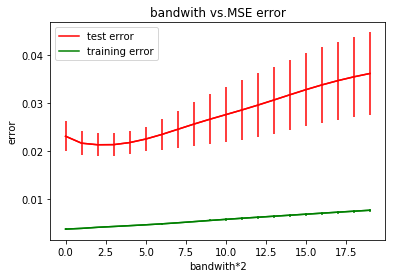

In [40]:
#Task 2.3

def k_fold_cross_validation_RBF2(data, k,lamda,bandwidth):
    n_data = data.shape[0];
    test_size = int(n_data/k);   
    
    #loop over k fold (each time leave one out to make a test set)  
    
    all_errors_test  = []
    all_errors_train = []
    for i in range(k):
        leave_out_data = data[test_size*i:test_size*(i+1),:]
        training_data  = data[0:test_size*i,:]
        training_data  = np.vstack((training_data,data[test_size*(i+1):,:]))
        
        # computing feature matrix
        X_training, y_training = training_data[:,:-1],training_data[:,-1]
        
        centroids, assignments, errors = find_clusters(X_training, number_centroids);
        
        PHI_training_data = RBF_Features(X_training,centroids,bandwidth);    
        
        Identity = np.identity(PHI_training_data.shape[1]) # identity matrix

        beta__ = dot(dot(inv(np.add(dot(PHI_training_data.T, PHI_training_data),lamda*Identity)), 
                         PHI_training_data.T), y_training);
        
        #computing error on the training dataset
        err_train =  MSE_computing(PHI_training_data,beta__,y_training)
       
    
        #computing error on the leave_out dataset
        X_test, y_test = leave_out_data[:,:-1],leave_out_data[:,-1]
        PHI_leave_out_data = RBF_Features(X_test,centroids,bandwidth);
        err_test =  MSE_computing(PHI_leave_out_data,beta__,y_test)
        
        # add this test/training error for computing statistics
        all_errors_test.append(err_test)
        all_errors_train.append(err_train)
        
        
    # returning the mean and standard deviation of the cross-validated errors
    return np.mean(all_errors_test), np.std(all_errors_test),np.mean(all_errors_train), np.std(all_errors_train)


print("RBF feature with five_fold_cross_validation:");

k_fold = 5;
lamda = 0.1;
num_candidates = 20;
regular = np.zeros([num_candidates,5])

best_bandwith = 0;
best_cost = 10000;

# loop over num_candidates possible candidates of bandwith
for k in range(1,21):
    bandwith = 0.5 * k; 
    mean_test, std_test, mean_train, mean_std = k_fold_cross_validation_RBF2(data,k_fold,lamda,bandwith);
    regular[k-1,0] = bandwith;
    regular[k-1,1:] = mean_test, std_test, mean_train, mean_std;

    if best_cost > mean_test:
        best_cost = mean_test;
        best_bandwith = bandwith;




fig = plt.figure();
fig = fig.add_subplot(1, 1, 1);
plt.plot(np.arange(num_candidates),regular[:,1],'red',label="test error");
plt.plot(np.arange(num_candidates),regular[:,3],'green',label="training error");

#plotting the error bars (with standard deviations)
plt.errorbar(np.arange(num_candidates),regular[:,1], yerr=regular[:,2], color='red');
plt.errorbar(np.arange(num_candidates),regular[:,3], yerr=regular[:,4], color='green');

plt.title(r"bandwith vs.MSE error");
plt.legend(loc='upper left');
plt.xlabel(r'bandwith*2');
plt.ylabel('error');
plt.draw();

print('best bandwith = ',best_bandwith);
print('best best_cost = ',best_cost);





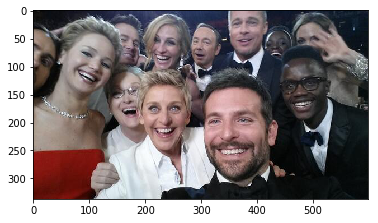

(201863, 4)
iteration:  1  the within-cluster square error is:  1692978214.3056092
(201863, 4)
iteration:  2  the within-cluster square error is:  367700764.25326234
(201863, 4)
iteration:  3  the within-cluster square error is:  321904709.32965744
(201863, 4)
iteration:  4  the within-cluster square error is:  298844368.3779214
(201863, 4)
iteration:  5  the within-cluster square error is:  286471286.29598516
(201863, 4)
iteration:  6  the within-cluster square error is:  280504330.5285406
(201863, 4)
iteration:  7  the within-cluster square error is:  277539205.85134184
(201863, 4)
iteration:  8  the within-cluster square error is:  276084667.8691695
(201863, 4)
iteration:  9  the within-cluster square error is:  275325434.2354585
(201863, 4)
iteration:  10  the within-cluster square error is:  274922527.4402926
(201863, 4)
iteration:  11  the within-cluster square error is:  274655305.33465403
(201863, 4)
iteration:  12  the within-cluster square error is:  274464420.8741778
(201863

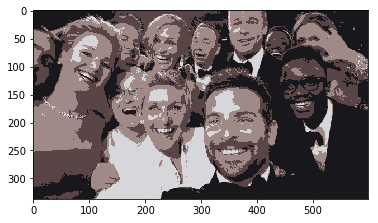

In [51]:
#Task 3

path = 'helen.jpg';
image = plt.imread(path);


plt.imshow(image);
plt.show();

imageData = [];

#traversal the image and get the information of each pixel
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        tmp = []
        tmp.append(image[i][j][0]);
        tmp.append(image[i][j][1])
        tmp.append(image[i][j][2])
        imageData.append(tmp)

imageData = np.array(imageData);

centroids, assignments, errors = find_clusters(imageData, 4);

print("centroids: ",centroids);

new_image_data = np.copy (imageData)
for i in range(4):
    new_image_data[assignments == i] = centroids[i]  # assign pixel color to its centroid's color
    
new_image_data = new_image_data.reshape(image.shape)
plt.imshow(new_image_data );
plt.show();


